# Sentiment analysis of IMDb movie reviews

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load IMDb dataset
max_features = 10000  # Vocabulary size
max_len = 200  # Max sequence length

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

print('Training data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (25000, 200)
Testing data shape: (25000, 200)


In [2]:

# Build LSTM model
model = Sequential([
    Embedding(max_features, 128, input_length=max_len),
    LSTM(128, dropout=0.3, recurrent_dropout=0.3),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=Adam(1e-3), metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [3]:

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 234s 730ms/step - accuracy: 0.6702 - loss: 0.5812 - val_accuracy: 0.8470 - val_loss: 0.3601
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 252s 701ms/step - accuracy: 0.8570 - loss: 0.3447 - val_accuracy: 0.8198 - val_loss: 0.4038
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 266s 715ms/step - accuracy: 0.8683 - loss: 0.3175 - val_accuracy: 0.8460 - val_loss: 0.3723
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 235s 750ms/step - accuracy: 0.8998 - loss: 0.2580 - val_accuracy: 0.8422 - val_loss: 0.3847
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 227s 724ms/step - accuracy: 0.9173 - loss: 0.2161 - val_accuracy: 0.8598 - val_loss: 0.3855


In [4]:

# Evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=1)
print(f'Test Accuracy: {acc:.4f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.8493 - loss: 0.4030
Test Accuracy: 0.8497


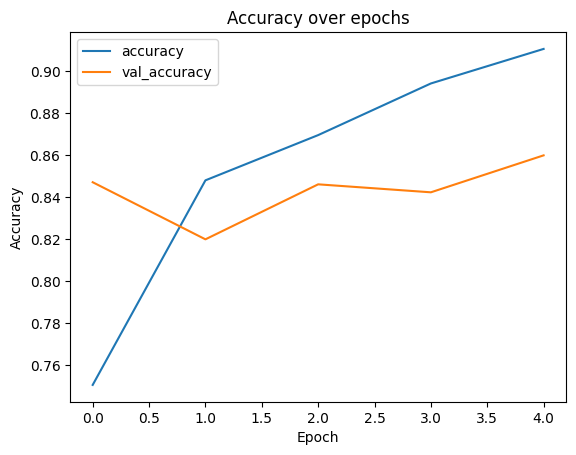

In [5]:

# Plot training results
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()